In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import time 
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14,14]


In [8]:
#customer_list = ["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11"]
customer_list = ["C1", "C2", "C3", "C4", "C5"]
product_list = ["P1", "P2", "P3", "P4", "P5", "P6", "P7", "P8", "P9", "P10", "P11", "P12", "P13", "P14", "P15", "P16", "P17", "P18", "P19", "P20"]
category_list = ["Cat1", "Cat2", "Cat3", "Cat4"]
loc_list = ["L1", "L2", "L3"]
G = nx.Graph(label="FIRST_ONE")
for cust_id in customer_list:
    G.add_node(cust_id, key=cust_id, label='CUSTOMER')
for prod_id in product_list:
    G.add_node(prod_id, key=prod_id, label='PRODUCT')
for loc_id in loc_list:
    G.add_node(loc_id, key=loc_id, label='LOCATION')
for cat_id in category_list:
    G.add_node(cat_id, key=cat_id, label='CATEGORY')
    
G.add_edge("C1", "P1", label="BOUGHT")
G.add_edge("C1", "P2", label="BOUGHT")
G.add_edge("C1", "P3", label="BOUGHT")
G.add_edge("C1", "P4", label="BOUGHT")
G.add_edge("C1", "P5", label="BOUGHT")
G.add_edge("C1", "P6", label="BOUGHT")
G.add_edge("C1", "P8", label="BOUGHT")
G.add_edge("C1", "P17", label="BOUGHT")
G.add_edge("C2", "P2", label="BOUGHT")
G.add_edge("C2", "P3", label="BOUGHT")
G.add_edge("C2", "P7", label="BOUGHT")
G.add_edge("C2", "P9", label="BOUGHT")
G.add_edge("C2", "P14", label="BOUGHT")
G.add_edge("C3", "P7", label="BOUGHT")
G.add_edge("C3", "P8", label="BOUGHT")
G.add_edge("C3", "P10", label="BOUGHT")
G.add_edge("C3", "P12", label="BOUGHT")
G.add_edge("C3", "P9", label="BOUGHT")
G.add_edge("C3", "P15", label="BOUGHT")
G.add_edge("C4", "P8", label="BOUGHT")
G.add_edge("C4", "P10", label="BOUGHT")
G.add_edge("C4", "P11", label="BOUGHT")
G.add_edge("C4", "P13", label="BOUGHT")
G.add_edge("C4", "P14", label="BOUGHT")
G.add_edge("C4", "P15", label="BOUGHT")
G.add_edge("C4", "P16", label="BOUGHT")
G.add_edge("C5", "P11", label="BOUGHT")
G.add_edge("C5", "P15", label="BOUGHT")
G.add_edge("C5", "P16", label="BOUGHT")
G.add_edge("C5", "P17", label="BOUGHT")
G.add_edge("C5", "P18", label="BOUGHT")
G.add_edge("C5", "P19", label="BOUGHT")
G.add_edge("C5", "P20", label="BOUGHT")

G.add_edge("C1", "L1", label="AT")
G.add_edge("C2", "L1", label="AT")
G.add_edge("C3", "L2", label="AT")
G.add_edge("C4", "L2", label="AT")
G.add_edge("C5", "L3", label="AT")

G.add_edge("P1", "Cat1", label="IS")
G.add_edge("P2", "Cat1", label="IS")
G.add_edge("P8", "Cat1", label="IS")
G.add_edge("P19", "Cat1", label="IS")
G.add_edge("P20", "Cat1", label="IS")
G.add_edge("P3", "Cat2", label="IS")
G.add_edge("P5", "Cat2", label="IS")
G.add_edge("P7", "Cat2", label="IS")
G.add_edge("P11", "Cat2", label="IS")
G.add_edge("P13", "Cat2", label="IS")
G.add_edge("P6", "Cat3", label="IS")
G.add_edge("P10", "Cat3", label="IS")
G.add_edge("P15", "Cat3", label="IS")
G.add_edge("P16", "Cat3", label="IS")
G.add_edge("P17", "Cat3", label="IS")
G.add_edge("P18", "Cat3", label="IS")
G.add_edge("P4", "Cat4", label="IS")
G.add_edge("P9", "Cat4", label="IS")
G.add_edge("P12", "Cat4", label="IS")
G.add_edge("P14", "Cat4", label="IS")



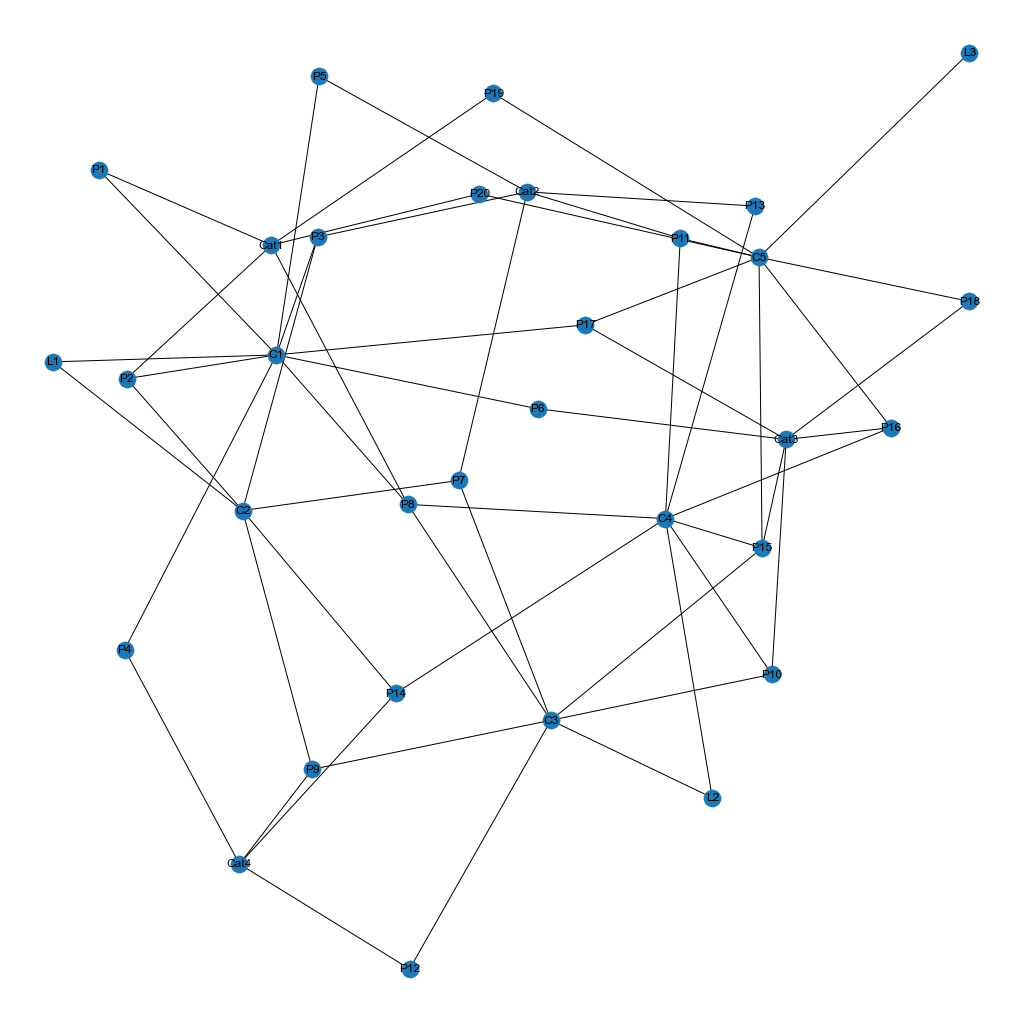

In [9]:
nx.draw(G, with_labels = True) 

In [10]:
def draw_sub_graph(sub_graph):
    subgraph = G.subgraph(sub_graph)
    colors=[]
    for e in subgraph.nodes():
        if G.nodes[e]['label']=="CUSTOMER":
            colors.append('cyan')
        elif G.nodes[e]['label']=="PRODUCT":
            colors.append('yellow')
        elif G.nodes[e]['label']=="LOCATION":
            colors.append('red')
        elif G.nodes[e]['label']=="CATEGORY":
            colors.append('green')
   
    nx.draw(subgraph, with_labels=True, font_weight='bold',node_color=colors)
    plt.show()

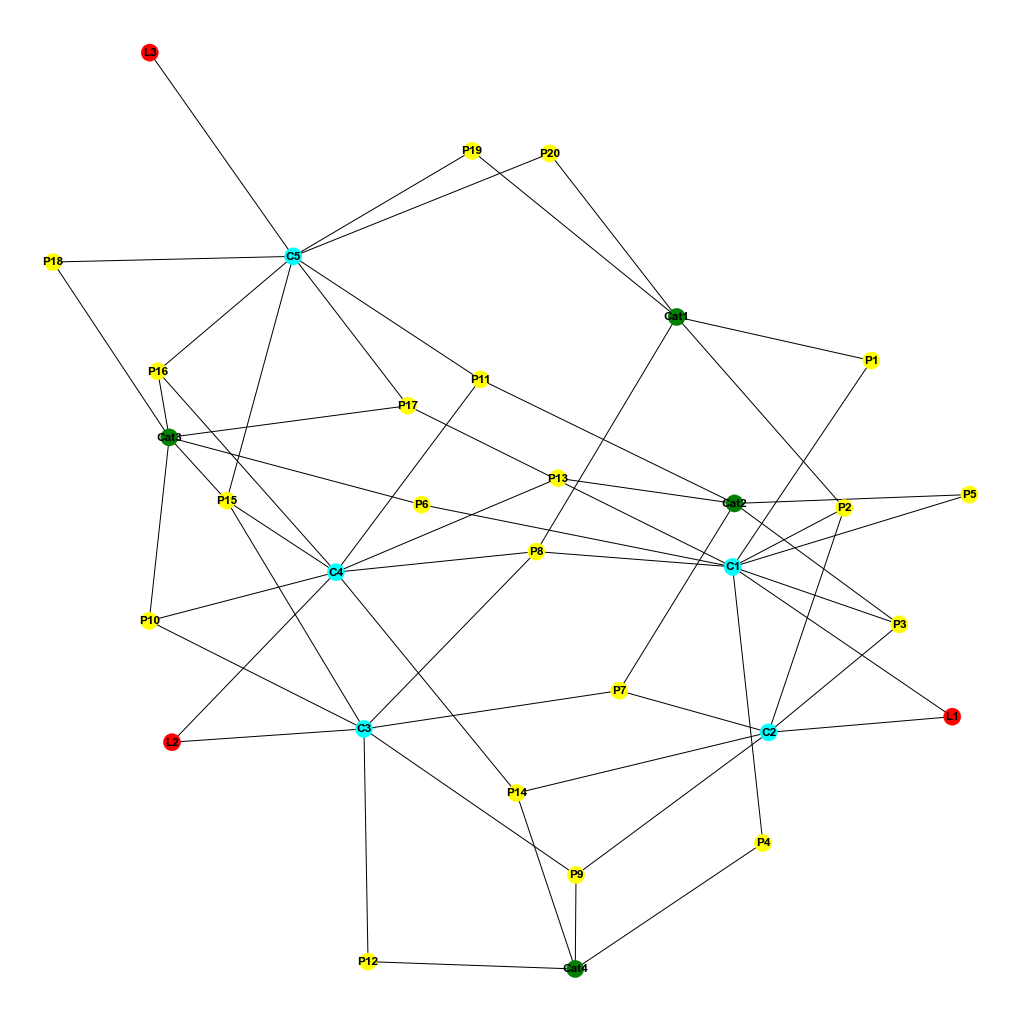

In [11]:
draw_sub_graph(G)

In [12]:
#prediction için
len(list(G.neighbors("C1")))

9

In [14]:
common_neighbors = []
user_id_list = []
for i in range(1,6):
    user_id = "C"+str(i)
    user_id_list.append(user_id)
    common_neighbors.append(len(list(nx.common_neighbors(G, "C1", user_id))))
common_neighbors_df = pd.DataFrame({"cust_id": 4850, 
                                    "unconnctd_cust_id": user_id_list, "common_neighbors": common_neighbors})

In [15]:
common_neighbors_df.sort_values(by = "common_neighbors", ascending=False).head()

,cust_id,unconnctd_cust_id,common_neighbors
0,4850,C1,9
1,4850,C2,3
2,4850,C3,1
3,4850,C4,1
4,4850,C5,1


In [40]:
for i in range(1,6):
    user_id = "C"+str(i)
    dg = G.degree(user_id)
    print(user_id + ":" +str(dg) )
for i in range(1,21):
    prod_id = "P"+str(i)
    dg = G.degree(prod_id)
    print(prod_id + ":" +str(dg) )


C1:9
C2:6
C3:7
C4:8
C5:8
P1:2
P2:3
P3:3
P4:2
P5:2
P6:2
P7:3
P8:4
P9:3
P10:3
P11:3
P12:2
P13:2
P14:3
P15:4
P16:3
P17:3
P18:2
P19:2
P20:2


In [22]:
def findCommonNeighbors(_id, _type):
    l = len(list(G.neighbors(_id)))
    common_neighbors = []
    if _type == "CUSTOMER":
        
        user_id_list = []
        for i in range(1,6):
            user_id = "C"+str(i)
            user_id_list.append(user_id)
            common_neighbors.append(len(list(nx.common_neighbors(G, _id, user_id))))
        common_neighbors_df = pd.DataFrame({"cust_id": _id, 
                                            "unconnctd_cust_id": user_id_list, "common_neighbors": common_neighbors})
        common_neighbors_df = common_neighbors_df.sort_values(by = "common_neighbors", ascending=False)
    elif _type == "PRODUCT":
        
        prod_id_list = []
        for i in range(1,21):
            prod_id = "P"+str(i)
            prod_id_list.append(prod_id)
            common_neighbors.append(len(list(nx.common_neighbors(G, _id, prod_id))))
        common_neighbors_df = pd.DataFrame({"prod_id": _id, 
                                            "unconnctd_prod_id": prod_id_list, "common_neighbors": common_neighbors})
        common_neighbors_df = common_neighbors_df.sort_values(by = "common_neighbors", ascending=False)
    return common_neighbors_df

In [23]:
c_n = findCommonNeighbors("C2", "CUSTOMER")
c_n.head()

,cust_id,unconnctd_cust_id,common_neighbors
1,C2,C2,6
0,C2,C1,3
2,C2,C3,2
3,C2,C4,1
4,C2,C5,0


In [24]:
p_n = findCommonNeighbors("P8", "PRODUCT")
p_n.head()

,prod_id,unconnctd_prod_id,common_neighbors
7,P8,P8,4
0,P8,P1,2
14,P8,P15,2
9,P8,P10,2
1,P8,P2,2


In [36]:
def get_recommendation(root):
    commons_dict = {}
    for e in G.neighbors(root):
        print(e)
        if e==root:
            continue
        if G.nodes[e]['label']=="PRODUCT":
            print(e)
            commons = commons_dict.get(e)
            if commons==None:
                commons_dict.update({e : [root]})
            else:
                commons.append(e)
                commons_dict.update({e : commons})
    for e2 in G.neighbors(root):
        print(e2)
        if e2==root:
            continue
        if G.nodes[e2]['label']=="PRODUCT":
            print(e2)
            commons = commons_dict.get(e2)
            if commons==None:
                commons_dict.update({e2 : [root]})
            else:
                commons.append(e)
                commons_dict.update({e2 : commons})
    print(commons_dict)
    products=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        for e in values:
            w=w+1/math.log(G.degree(e))
        products.append(key) 
        weight.append(w)
    
    result = pd.Series(data=np.array(weight),index=products)
    result.sort_values(inplace=True,ascending=False)        
    return result;

In [37]:
res = get_recommendation("C1")

P1
P1
P2
P2
P3
P3
P4
P4
P5
P5
P6
P6
P8
P8
P17
P17
L1
{'P1': ['C1'], 'P2': ['C1'], 'P3': ['C1'], 'P4': ['C1'], 'P5': ['C1'], 'P6': ['C1'], 'P8': ['C1'], 'P17': ['C1']}


In [41]:
from community import community_louvain
partition = community_louvain.best_partition(G, resolution = 1.5)

In [42]:
values = list(partition.values())
print('Number of communities:', len(np.unique(values)))

Number of communities: 4


In [43]:
print(partition)

{'C1': 0, 'C2': 0, 'C3': 1, 'C4': 2, 'C5': 2, 'P1': 3, 'P2': 0, 'P3': 0, 'P4': 1, 'P5': 0, 'P6': 2, 'P7': 0, 'P8': 3, 'P9': 1, 'P10': 2, 'P11': 2, 'P12': 1, 'P13': 0, 'P14': 2, 'P15': 2, 'P16': 2, 'P17': 2, 'P18': 2, 'P19': 3, 'P20': 3, 'L1': 0, 'L2': 2, 'L3': 2, 'Cat1': 3, 'Cat2': 0, 'Cat3': 2, 'Cat4': 1}
